This code is for examining those proteins where I have both the autoinhibited and active state.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib as mpl
import numpy as np
import scipy as sp
import json

In [30]:
'''
Isolate the proteins with both states
'''

df = pd.read_csv('./project_pipeline/data/disorder.tsv', sep='\t').astype('object')

df['distinct_count'] = df.groupby('uniprot')['state'].transform('nunique')

# Dataframe with only proteins with both states
both_states = df[df['distinct_count'] == 2]
states_list = both_states['uniprot'].unique()
print(len(both_states))

281


c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

Number  of Active and open: 89
Number of active and closed: 9
Number of autoinhibited and open: 2
Number of autoinhibited and closed: 141


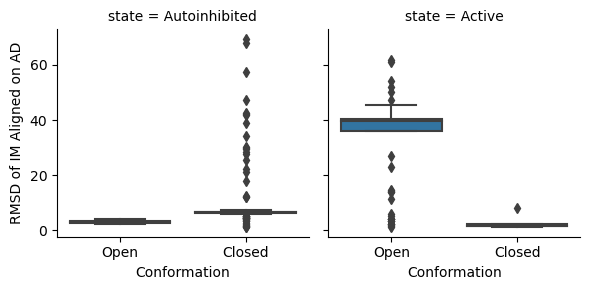

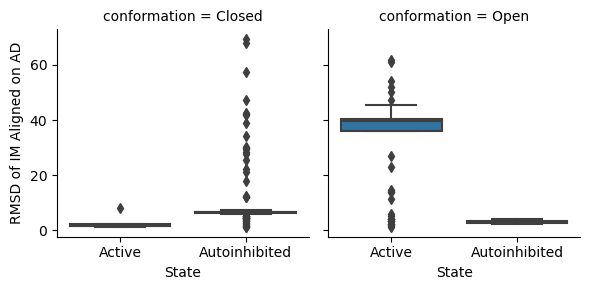

In [35]:
df_disorder = both_states.astype({'region_1_mean_plddt': 'float', '2_comp': 'float'})
df_active = df_disorder[df_disorder['state'] == 'Active']
df_autoin = df_disorder[df_disorder['state'] == 'Autoinhibited']
df_open = df_disorder[df_disorder['conformation'] == 'Open']
df_closed = df_disorder[df_disorder['conformation'] == 'Closed']

g1 = sns.FacetGrid(data=df_disorder, col='state')
g1.map(sns.boxplot, 'conformation', '2_comp', order=['Open', 'Closed'])
g1.set_axis_labels('Conformation', 'RMSD of IM Aligned on AD')
g1.savefig('./project_pipeline/data/figures/subset_rmsd_state.png', dpi=300, bbox_inches='tight')

g2 = sns.FacetGrid(data=df_disorder, col='conformation')
g2.map(sns.boxplot, 'state', '2_comp', order=['Active', 'Autoinhibited'])
g2.set_axis_labels('State', 'RMSD of IM Aligned on AD')
g2.savefig('./project_pipeline/data/figures/subset_rmsd_conformation.png', dpi=300, bbox_inches='tight')


act_op = df_disorder[(df_disorder['state'] == 'Active') & (df_disorder['conformation'] == 'Open')]
act_clo = df_disorder[(df_disorder['state'] == 'Active') & (df_disorder['conformation'] == 'Closed')]
aut_op = df_disorder[(df_disorder['state'] == 'Autoinhibited') & (df_disorder['conformation'] == 'Open')]
aut_clo = df_disorder[(df_disorder['state'] == 'Autoinhibited') & (df_disorder['conformation'] == 'Closed')]

print('Number  of Active and open: ' + str(len(act_op)))
print('Number of active and closed: ' + str(len(act_clo)))
print('Number of autoinhibited and open: ' + str(len(aut_op)))
print('Number of autoinhibited and closed: ' + str(len(aut_clo)))

c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

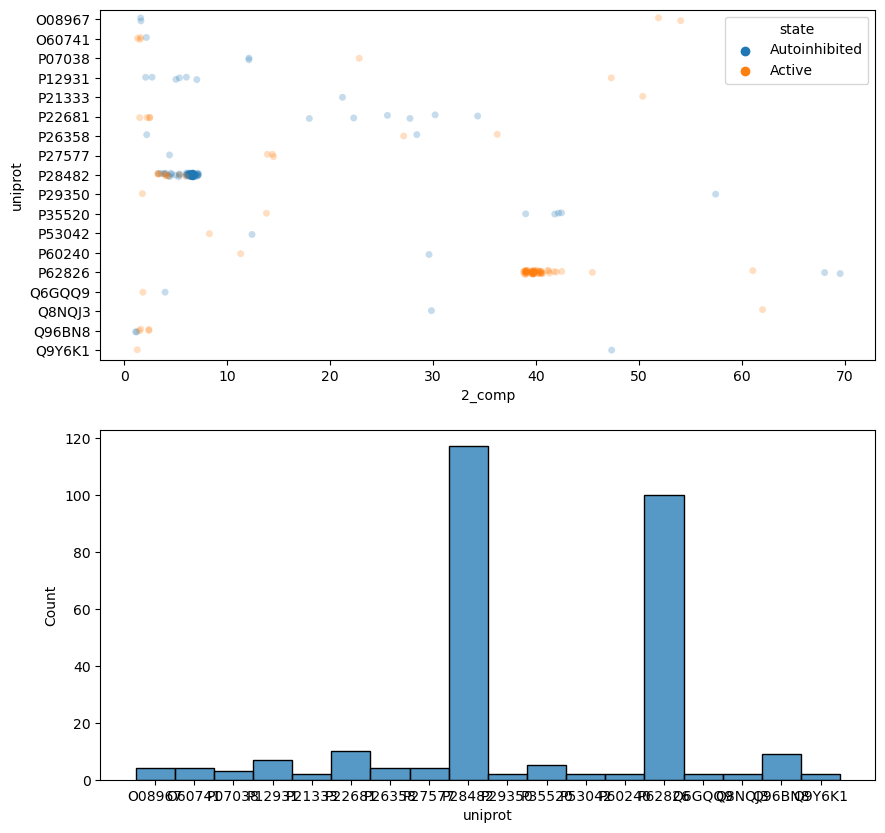

In [29]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

sns.stripplot(data=both_states, x='2_comp', y='uniprot', hue='state', dodge=False, alpha=0.25, ax=ax[0])

sns.histplot(data=both_states, x='uniprot', ax=ax[1])

plt.show()